### 親水性ポケット or 疎水性ポケットを持つタンパクを取得

In [1]:
import sys
sys.path.append('../..')

In [2]:
import os
import numpy as np
from lib.path import get_training_data_dir
from data_loader.SingleDataLoader import SingleDataLoader

2024-07-13 13:42:49.170768: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 13:42:49.173100: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 13:42:49.204150: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 13:42:49.204169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 13:42:49.205146: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [5]:
data_dir = '../../../data'
phobic_pdb_list_path = os.path.join(data_dir, 'pdb_group/hydrophobic/train_hydrophobic_pdb')
philic_pdb_list_path = os.path.join(data_dir, 'pdb_group/hydrophobic/train_hydrophilic_pdb')

In [6]:
with open(phobic_pdb_list_path, 'r') as f:
    phobic_pdb_list = f.read().splitlines()
with open(philic_pdb_list_path, 'r') as f:
    philic_pdb_list = f.read().splitlines()

In [7]:
print(len(phobic_pdb_list), len(philic_pdb_list))

1090 1220


### それぞれのタンパクのトレーニングデータを取得し、合計値を配列に格納

In [8]:
DATA_TYPE1 = 'gr'
DATA_VOXEL_NUM = 10
CLASSIFYING_RULE = 'WaterClassifyingRuleSurface'
LIGAND_POCKET_DEFINER = 'LigandPocketDefinerOriginal'
LIGAND_VOXEL_NUM = 8
training_data_dir = get_training_data_dir(DATA_TYPE1, DATA_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER, LIGAND_VOXEL_NUM)

In [9]:
data_loader = SingleDataLoader(training_data_dir)
phobic_data, phobic_label = data_loader.load_data(phobic_pdb_list_path)
philic_data, philic_label = data_loader.load_data(philic_pdb_list_path)

Error processing 5ime: No data found for 5ime
Error processing 2pog: No data found for 2pog
Error processing 4io5: No data found for 4io5
Error processing 4r06: No data found for 4r06
Error processing 4poj: No data found for 4poj
Error processing 4m8e: No data found for 4m8e
Error processing 2ypo: No data found for 2ypo
Error processing 4pp3: No data found for 4pp3
Error processing 2p15: No data found for 2p15
Error processing 3fur: No data found for 3fur
Error processing 5bv3: No data found for 5bv3
Error processing 3qkd: No data found for 3qkd
Error processing 4k6i: No data found for 4k6i
Error processing 4io6: No data found for 4io6
Error processing 2oax: No data found for 2oax
Error processing 4abg: No data found for 4abg
Error processing 4pp5: No data found for 4pp5
Error processing 3u9q: No data found for 3u9q
Error processing 1pb8: No data found for 1pb8
Error processing 4io4: No data found for 4io4
Error processing 1pb9: No data found for 1pb9
Error processing 4lxd: No data fou

2024-07-12 10:25:32.583571: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Error processing 4cg9: No data found for 4cg9
Error processing 5ehr: No data found for 5ehr
Error processing 3pyy: No data found for 3pyy
Error processing 4aji: No data found for 4aji
Error processing 4cga: No data found for 4cga
Error processing 4eo6: No data found for 4eo6
Error processing 5l7h: No data found for 5l7h
Error processing 1nhu: No data found for 1nhu
Error processing 3ozj: No data found for 3ozj
Error processing 4mpn: No data found for 4mpn
Error processing 1yq7: No data found for 1yq7
Error processing 3ebp: No data found for 3ebp
Error processing 2vvs: No data found for 2vvs
Error processing 3mf5: No data found for 3mf5
Error processing 4p58: No data found for 4p58
Error processing 3ccz: No data found for 3ccz
Error processing 2vt3: No data found for 2vt3
Error processing 5egu: No data found for 5egu
Error processing 4lj8: No data found for 4lj8
Error processing 3kr4: No data found for 3kr4
Error processing 4b9z: No data found for 4b9z
Error processing 3jvs: No data fou

In [10]:
phobic_label

array([0., 0., 1., ..., 0., 0., 1.])

In [11]:
replace_sum_phobic = []
non_replace_sum_phobic = []
phobic_data_array = np.array(phobic_data)
for data, label in zip(phobic_data_array, phobic_label):
    if label == 0:
        non_replace_sum_phobic.append(data.sum())
    else:
        replace_sum_phobic.append(data.sum())

replace_sum_philic = []
non_replace_sum_philic = []
philic_data_array = np.array(philic_data)
for data, label in zip(philic_data_array, philic_label):
    if label == 0:
        non_replace_sum_philic.append(data.sum())
    else:
        replace_sum_philic.append(data.sum())

### plotする

In [12]:
import matplotlib.pyplot as plt

def plot_histogram(array1, array2, bins=100, title1='', title2=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1行2列のサブプロットを作成

    # array1のヒストグラムをプロット
    ax1.hist(array1, bins=bins, alpha=0.7, color='blue', label='Array 1')
    ax1.set_title(title1)
    ax1.set_xlabel('sum of gr')
    ax1.set_ylabel('Frequency')

    # array2のヒストグラムをプロット
    ax2.hist(array2, bins=bins, alpha=0.7, color='red', label='Array 2')
    ax2.set_title(title2)
    ax2.set_xlabel('sum of gr')
    ax2.set_ylabel('Frequency')

    plt.tight_layout()  # レイアウトを自動調整
    plt.show()  # グラフを表示

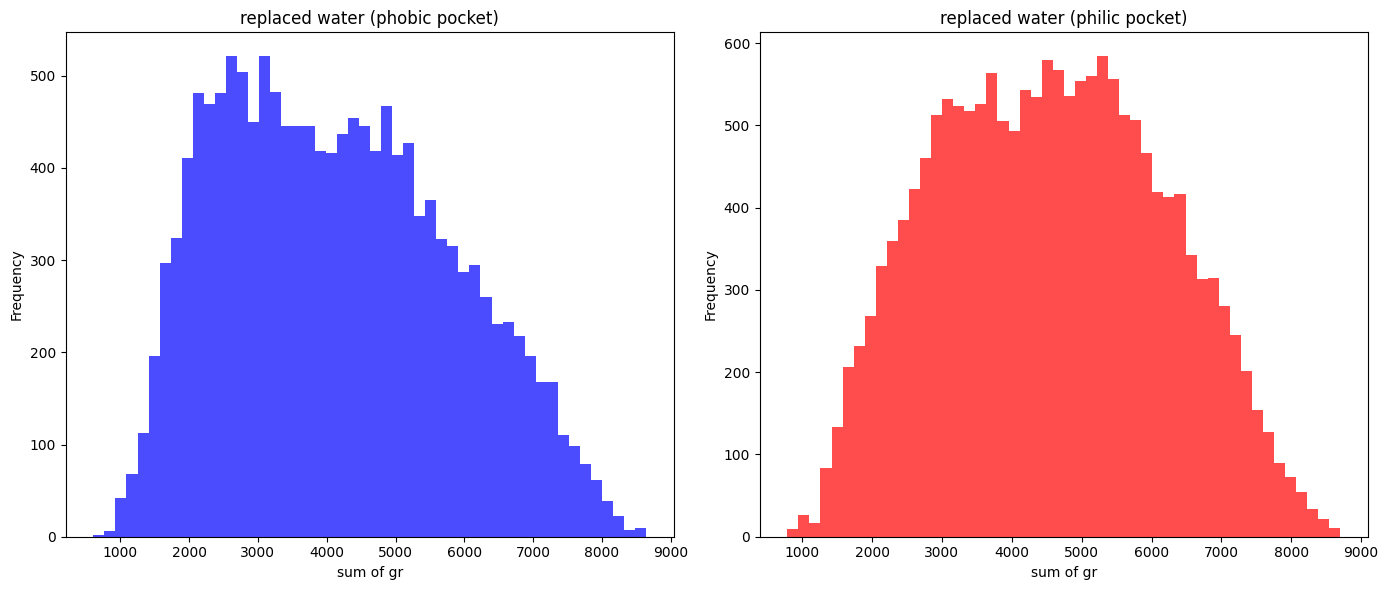

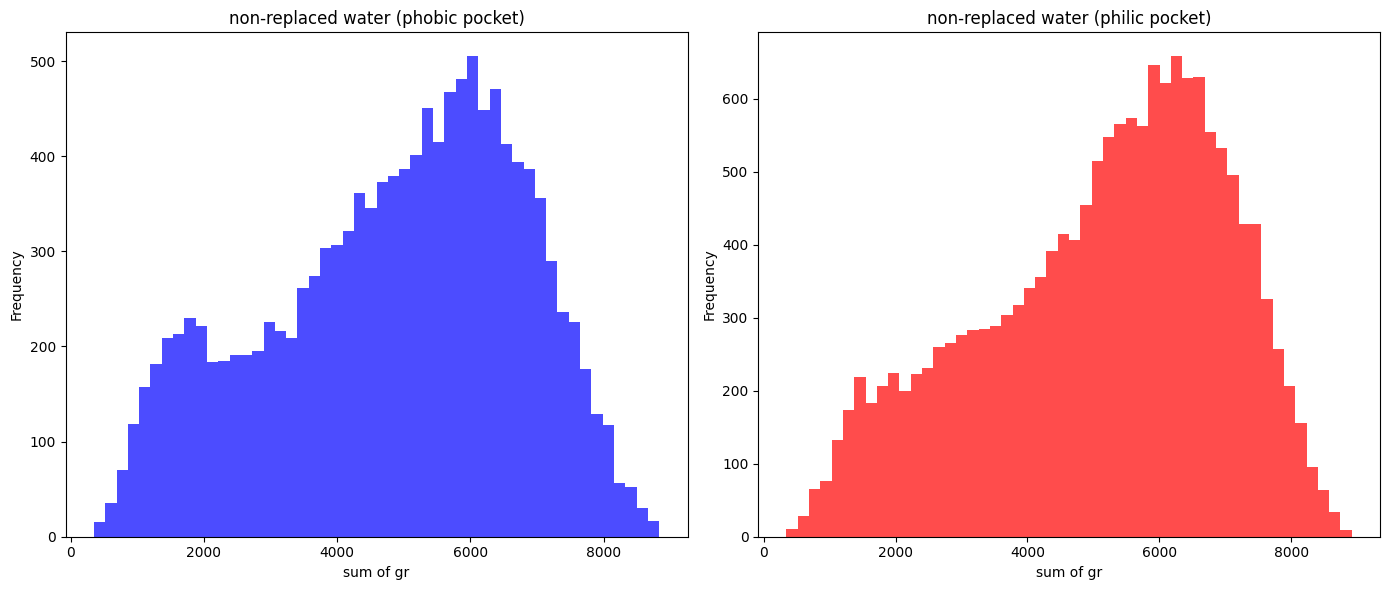

In [79]:
plot_histogram(replace_sum_phobic, replace_sum_philic, 50, 'replaced water (phobic pocket)', 'replaced water (philic pocket)')
plot_histogram(non_replace_sum_phobic, non_replace_sum_philic, 50, 'non-replaced water (phobic pocket)', 'non-replaced water (philic pocket)')

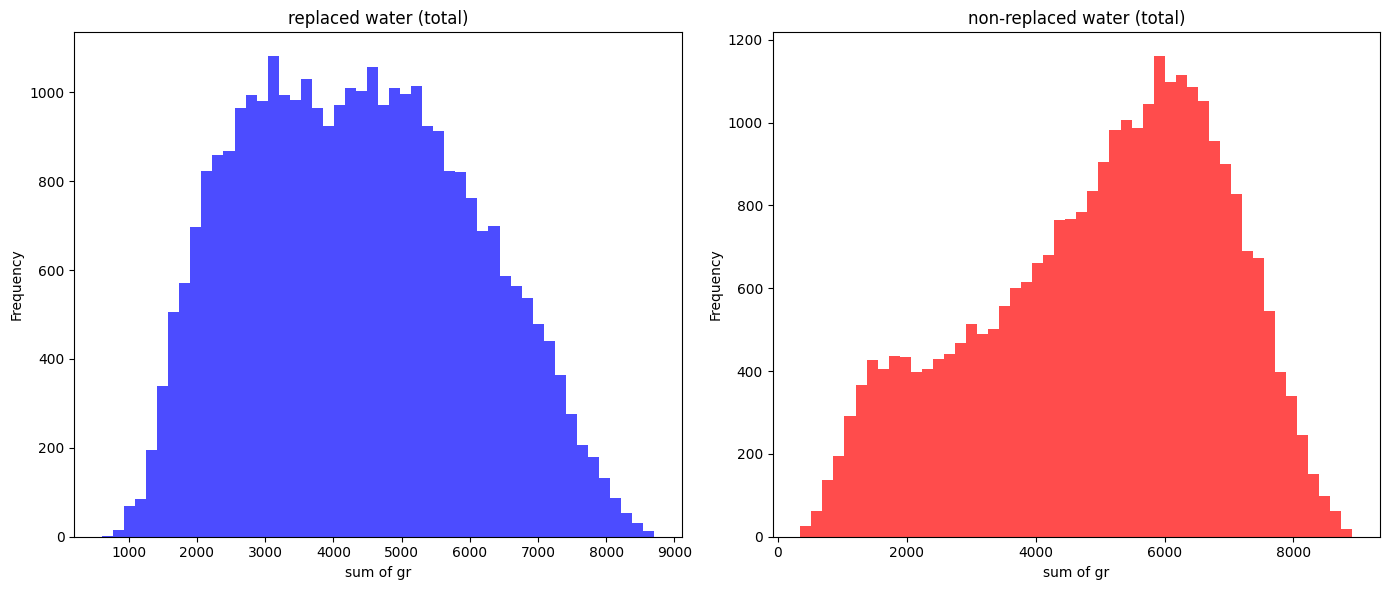

In [17]:
plot_histogram(replace_sum_phobic + replace_sum_philic, non_replace_sum_phobic + non_replace_sum_philic, 50, 'replaced water (total)', 'non-replaced water (total)')